In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import kagglehub
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")
print("Path to dataset files:", path)

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png
/kaggle/input/sales-forecasting/train.csv
Path to dataset files: /kaggle/input/sales-forecasting


In [2]:
file_path = '/kaggle/input/sales-forecasting/train.csv'
df = pd.read_csv(file_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")
df["year_order_date"]  = df["Order Date"].dt.year
df["month_order_date"] = df["Order Date"].dt.month
df["day_order_date"]   = df["Order Date"].dt.day
df['weekday_order_date'] = df['Order Date'].dt.weekday

df["year_ship_date"]   = df["Ship Date"].dt.year
df["month_ship_date"]  = df["Ship Date"].dt.month
df["day_ship_date"]    = df["Ship Date"].dt.day
df['weekdayship_date'] = df['Ship Date'].dt.weekday
df["Postal Code"]=df["Postal Code"].fillna(df["Postal Code"]).mean()
df['Postal Code']=df['Postal Code'].astype('int')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,year_order_date,month_order_date,day_order_date,weekday_order_date,year_ship_date,month_ship_date,day_ship_date,weekdayship_date
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2017,11,8,2,2017,11,11,5
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8,2,2017,11,11,5
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12,0,2017,6,16,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11,1,2016,10,18,1
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2016,10,11,1,2016,10,18,1


In [4]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,year_order_date,month_order_date,day_order_date,weekday_order_date,year_ship_date,month_ship_date,day_ship_date,weekdayship_date
count,9800.000000,9800,9800,9800.0,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469184,2017-05-05 04:17:52.653061120,55273.0,230.769059,2016.724184,7.818469,15.486837,2.993673,2016.739388,7.752245,15.895816,3.137653
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,55273.0,0.444000,2015.000000,1.000000,1.000000,0.000000,2015.000000,1.000000,1.000000,0.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,55273.0,17.248000,2016.000000,5.000000,8.000000,1.000000,2016.000000,5.000000,8.000000,2.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,55273.0,54.490000,2017.000000,9.000000,16.000000,3.000000,2017.000000,9.000000,16.000000,3.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,55273.0,210.605000,2018.000000,11.000000,23.000000,5.000000,2018.000000,11.000000,24.000000,5.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,55273.0,22638.480000,2018.000000,12.000000,31.000000,6.000000,2019.000000,12.000000,31.000000,6.000000
std,2829.160653,NaN,NaN,0.0,626.651875,1.123984,3.281905,8.753733,2.180441,1.126837,3.337933,8.804986,1.962640


In [5]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,year_order_date,month_order_date,day_order_date,weekday_order_date,year_ship_date,month_ship_date,day_ship_date,weekdayship_date,Shipping Duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2017,11,8,2,2017,11,11,5,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,2017,11,8,2,2017,11,11,5,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2017,6,12,0,2017,6,16,4,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,2016,10,11,1,2016,10,18,1,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2016,10,11,1,2016,10,18,1,7


Sales in 2018 (red line) are generally higher than previous years, suggesting business growth.

There are noticeable peaks in March, September, November, and December, indicating higher sales during these months.

Sales fluctuate significantly across months, emphasizing seasonal demand.

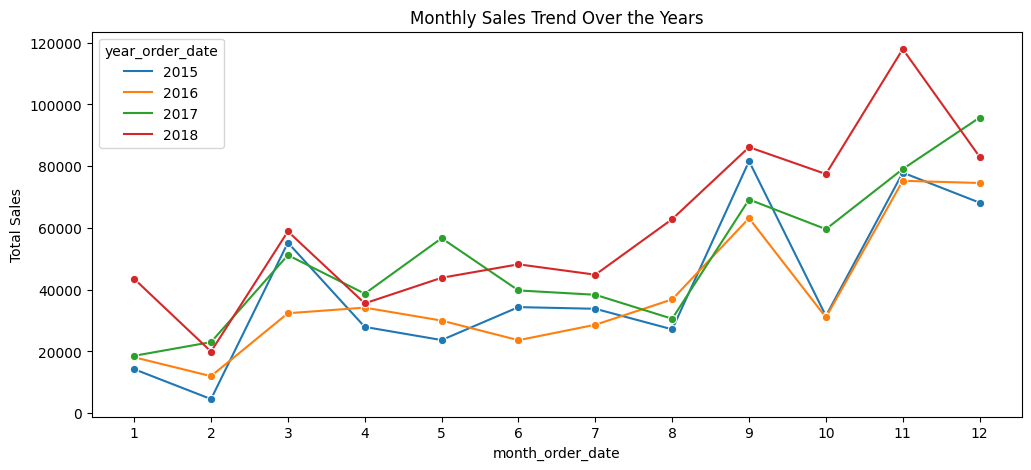

In [7]:
monthly_sales = df.groupby(["year_order_date", "month_order_date"])["Sales"].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x="month_order_date", y="Sales", hue="year_order_date", marker="o", palette="tab10")
plt.xlabel("month_order_date")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend Over the Years")
plt.xticks(range(1, 13))
plt.show()

Technology has a significant sales spike in March, September and December. Sales are unpredictable compared to Furniture and Office Supplies.

Furniture  and Office Supplies also have high sales in November-December. These categories exhibit a more stable trend with fewer fluctuations.

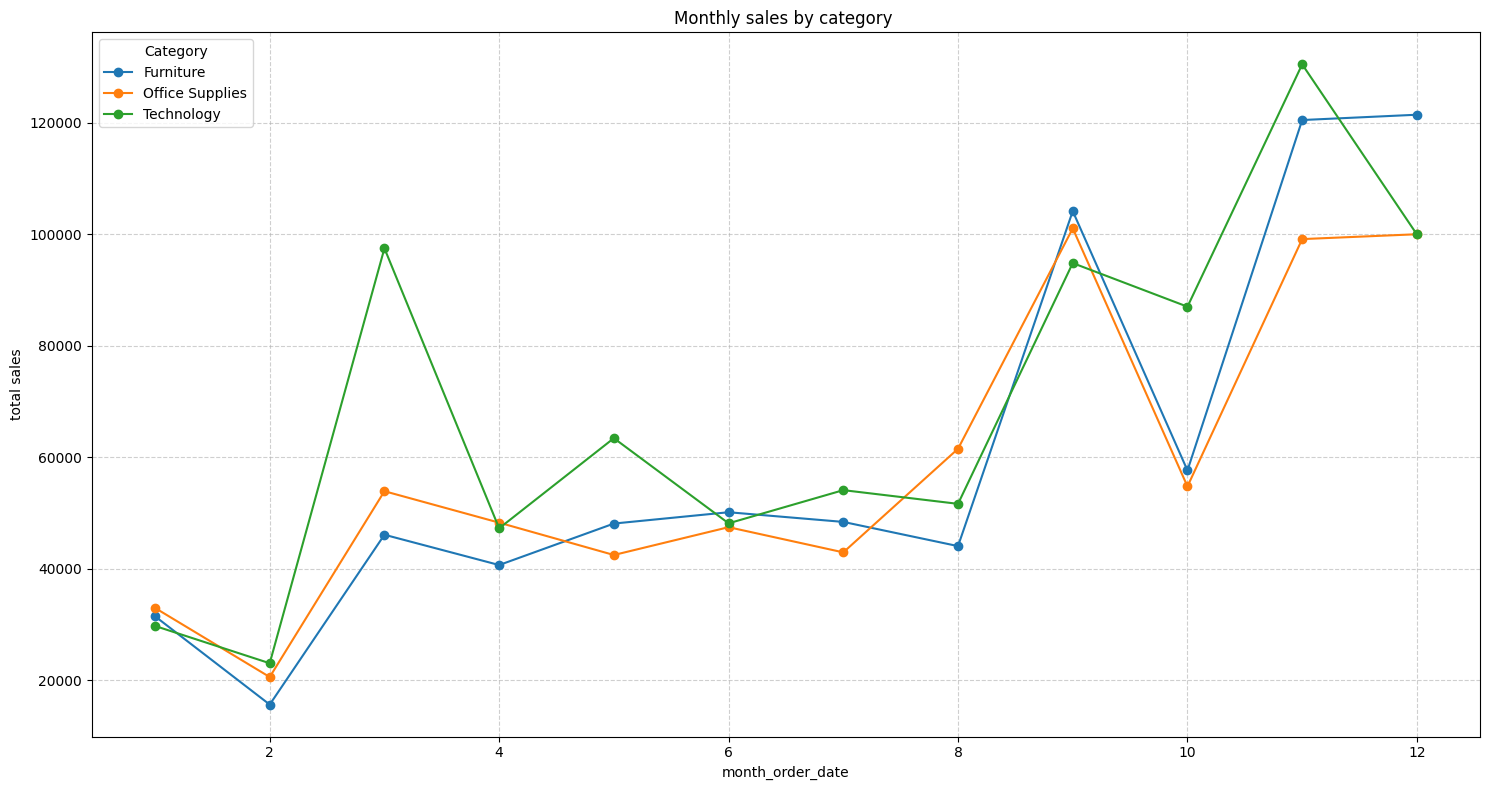

In [8]:
monthSalesByCategory = df.groupby(["month_order_date", "Category"])["Sales"].sum().unstack()
monthSalesByCategory.plot(kind="line", marker="o", figsize=(15, 8))
plt.title("Monthly sales by category ")
plt.xlabel("month_order_date")
plt.ylabel("total sales")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Category")
plt.tight_layout()

Sales in all three categories show an increasing trend from 2016 to 2018, indicating strong overall business growth

The Technology category exhibits the highest sales values and the steepest upward trend

Office Supplies sales decline from 2015 to 2016 but then experience significant growth in 2017 and 2018

Furniture sales show steady growth from 2016 onwards

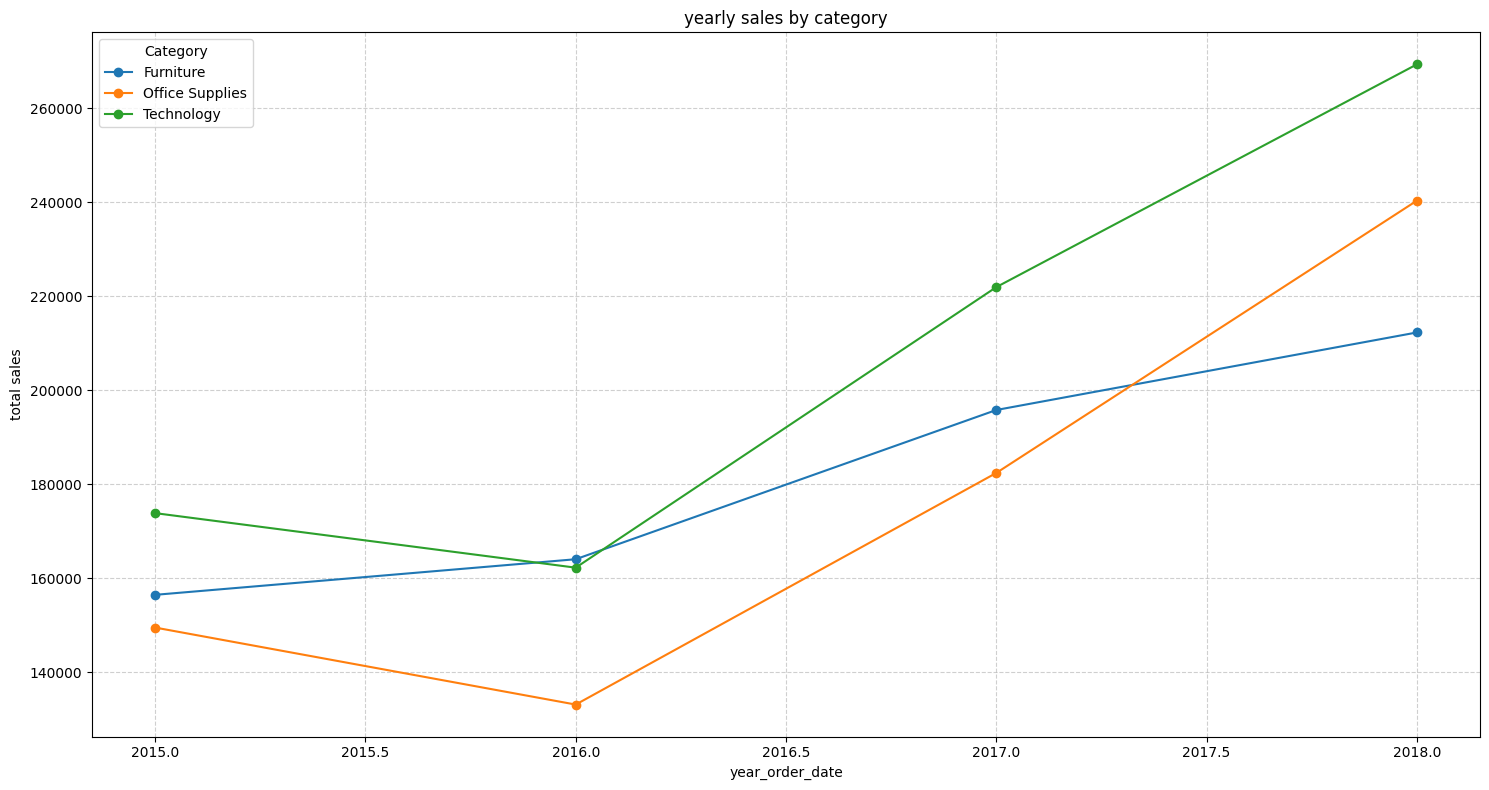

In [9]:
yearlyOrder = df.groupby(["year_order_date", "Category"])["Sales"].sum().unstack()
yearlyOrder.plot(kind="line", marker="o", figsize=(15, 8))
plt.title("yearly sales by category")
plt.xlabel("year_order_date")
plt.ylabel("total sales")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Category")
plt.tight_layout()

In [10]:
df2=df.groupby("year_order_date")["Sales"].mean().reset_index()
df2

,year_order_date,Sales
0,2015,245.702103
1,2016,223.569832
2,2017,236.855781
3,2018,221.624315


The most frequently sold products are Staple Envelope, Staples, and Easy-Staple Paper. 

These products are low-cost, frequently used office supplies, indicating high demand for everyday essentials.

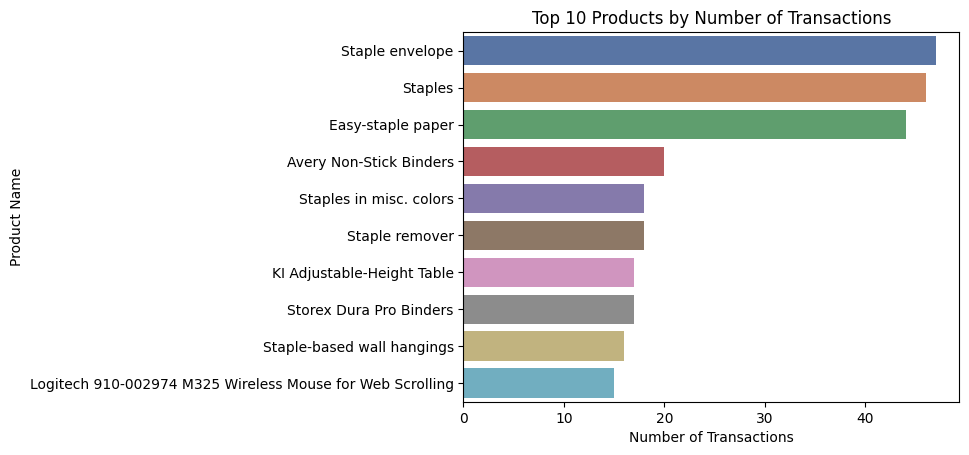

Product Name
Staple envelope                                              47
Staples                                                      46
Easy-staple paper                                            44
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      18
Staple remover                                               18
KI Adjustable-Height Table                                   17
Storex Dura Pro Binders                                      17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: Order ID, dtype: int64

In [11]:
top_products = df.groupby('Product Name')['Order ID'].count().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="deep")
plt.title('Top 10 Products by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Product Name')
plt.show()

top_products.head(10)

Expensive technology equipment drive total sales but are purchased less frequently. 

The highest revenue-generating product is the Canon imageCLASS 2200 Advanced Copier, significantly outperforming other items.

In [12]:
total_sales_python = df['Sales'].sum()
print("Total Sales (Python):", total_sales_python)

Total Sales (Python): 2261536.7827


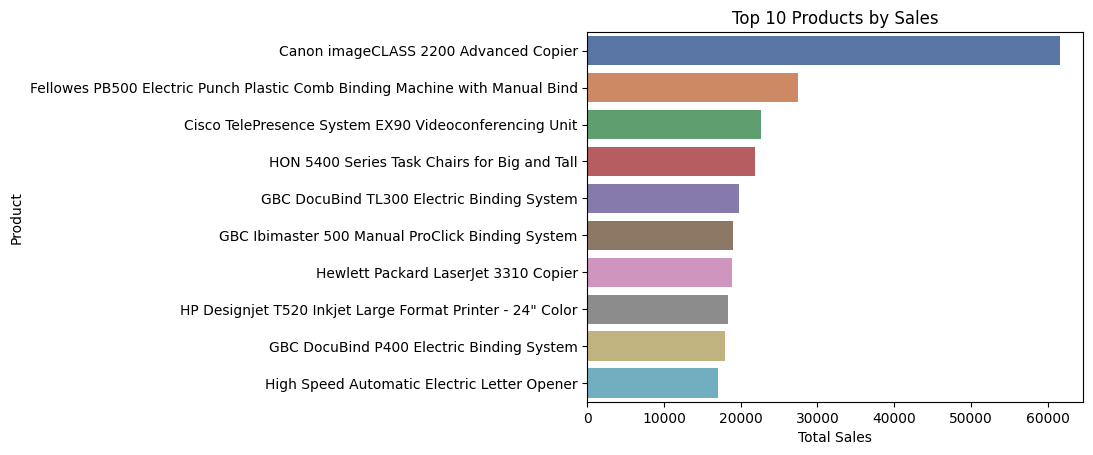

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

In [13]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="deep")
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()
top_products

"Binders" has the highest count indicating it is the most frequently occurring sub-category.

Less frequent sub-categories is Copiers due to lower demand

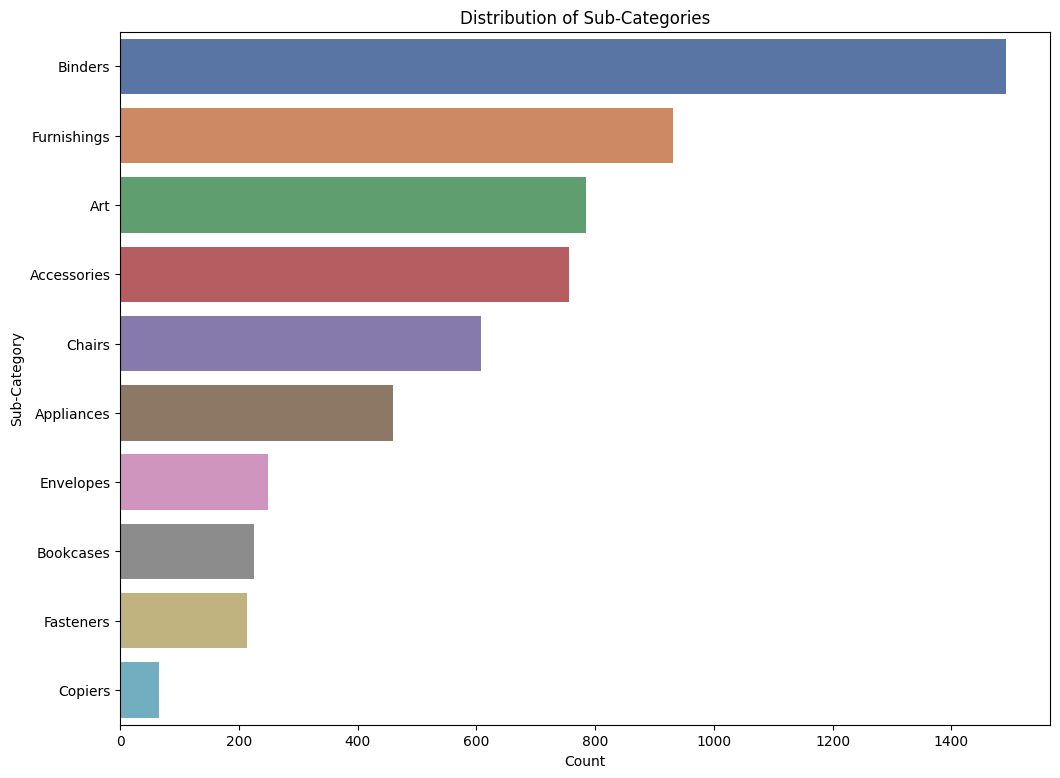

,Sub-Category,Sub category count
3,Binders,1492
9,Furnishings,931
2,Art,785
0,Accessories,756
5,Chairs,607
1,Appliances,459
7,Envelopes,248
4,Bookcases,226
8,Fasteners,214
6,Copiers,66


In [14]:
sub_category = df.groupby(['Sub-Category'])['Row ID'].count().reset_index().head(10)
sub_category.rename(columns={'Row ID': 'Sub category count'}, inplace=True)
sub_category.sort_values('Sub category count', ascending=False, inplace=True)

plt.figure(figsize=(12, 9))
sns.barplot(x=sub_category['Sub category count'], y=sub_category['Sub-Category'], palette="deep")

plt.xlabel('Count')
plt.ylabel('Sub-Category')
plt.title('Distribution of Sub-Categories')
plt.show()
sub_category

"Phones" have the highest total sales followed closely by "Chairs" 

A high count doesn’t always mean high sales. "Binders" had the highest count but lower total revenue than "Phones" and "Chairs."

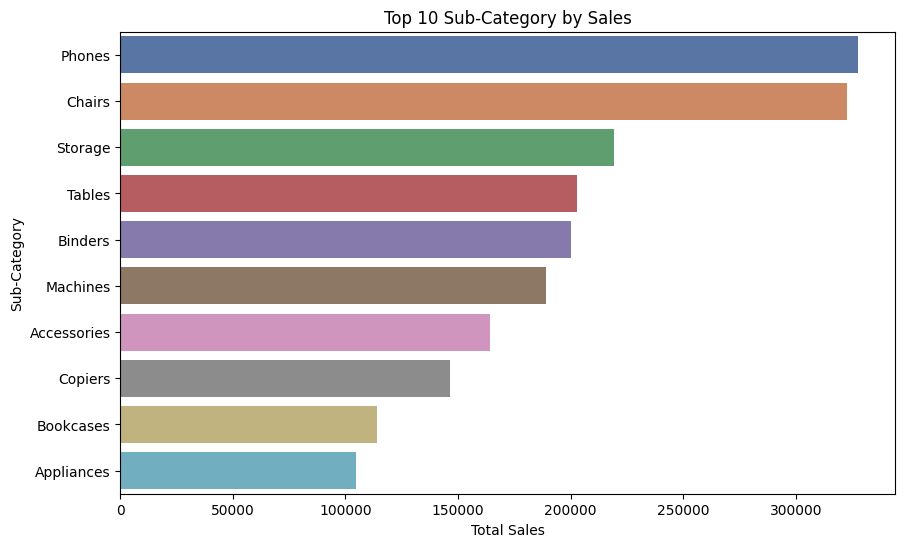

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: Sales, dtype: float64

In [15]:
top_products = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="deep")
plt.title('Top 10 Sub-Category by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()

top_products

Office Supplies has the highest count indicating it is the most frequently occurring category, suggesting  it is the dominant category in terms of quantity.
Technology and Furniture have significantly lower counts compared to Office Supplies.

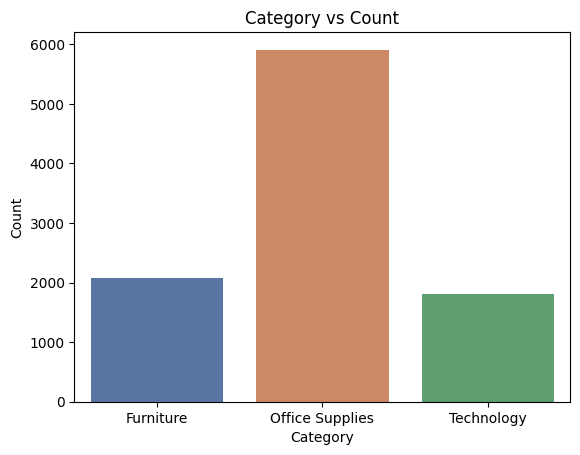

,Category,Customer ID
0,Furniture,2078
1,Office Supplies,5909
2,Technology,1813


In [16]:
sns.countplot(x=df['Category'], palette="deep")
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category vs Count')
plt.show()
df5=df.groupby("Category")["Customer ID"].size().reset_index()
df5

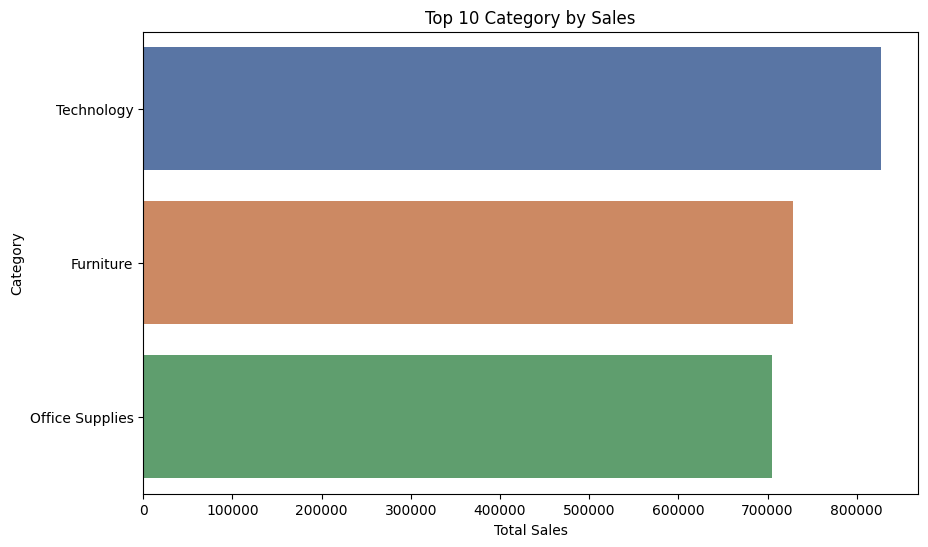

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

In [17]:
top_products = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="deep")
plt.title('Top 10 Category by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

top_products

The top repeat customer (EP-13915) has made 17 purchases while the others have made between 12 and 13 orders. There is a small difference in order counts among the top repeat customers.

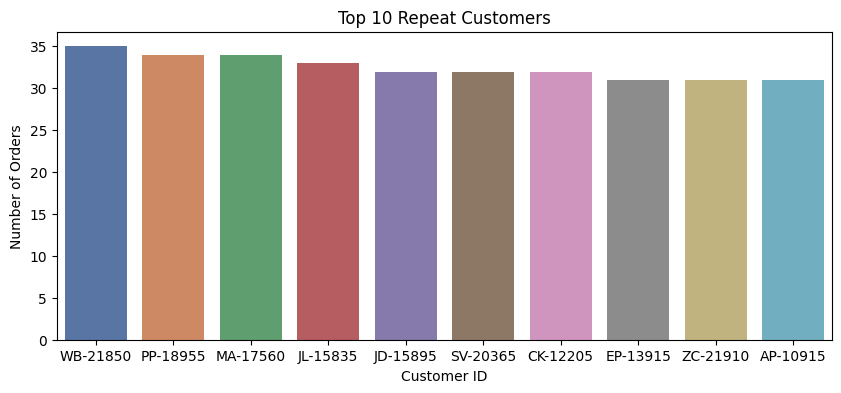

Customer ID
WB-21850    35
PP-18955    34
MA-17560    34
JL-15835    33
JD-15895    32
SV-20365    32
CK-12205    32
EP-13915    31
ZC-21910    31
AP-10915    31
Name: Order ID, dtype: int64

In [18]:
customer_orders = df.groupby("Customer ID")["Order ID"].count()
top_customers = customer_orders.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="deep")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.title("Top 10 Repeat Customers")
plt.show()
top_customers

The majority of shipments are made using Standard Class, followed by Second Class, First Class, and the least used Same Day shipping.

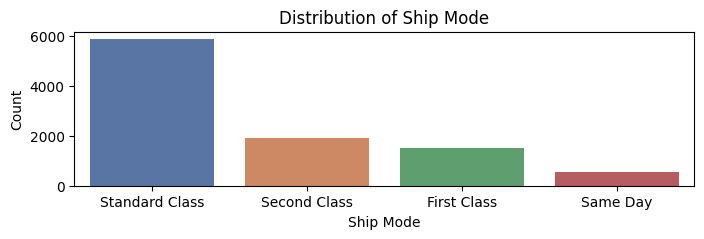

,Ship Mode,Count
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


In [19]:
plt.figure(figsize=(8, 2))
sns.countplot(x=df["Ship Mode"], order=df["Ship Mode"].value_counts().index, palette="deep")
plt.title("Distribution of Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Count")
plt.show()

ship_mode_counts = df["Ship Mode"].value_counts().reset_index()
ship_mode_counts.columns = ["Ship Mode", "Count"] 
ship_mode_counts

Standard Class generates the highest sales, followed by Second Class, First Class, and Same Day.
Despite having the lowest count, Same Day shipping still contributes a notable amount to sales.

In [20]:
Segments= df.groupby("Ship Mode").sum('Sales').sort_values("Sales",ascending=False)
Segments= Segments[['Sales']].round(2)
Segments.reset_index(inplace=True)
Segments

,Ship Mode,Sales
0,Standard Class,1340831.31
1,Second Class,449914.18
2,First Class,345572.26
3,Same Day,125219.04


The Consumer segment has the highest number of sales transactions.
The Corporate segment follows, with fewer transactions than the Consumer segment.
The Home Office segment has the lowest number of sales transactions.

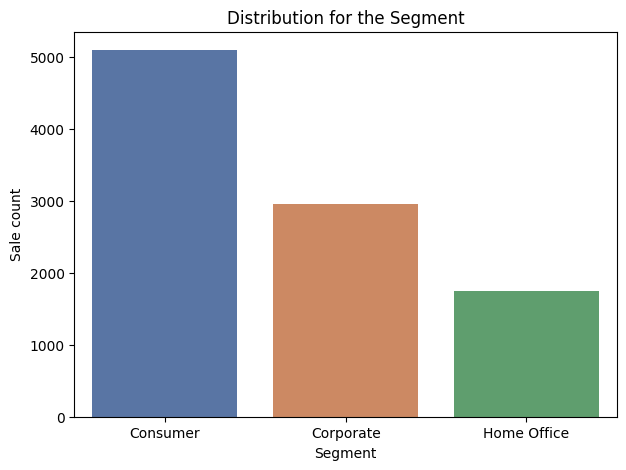

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: Row ID, dtype: int64

In [21]:
segment_count = df.groupby(['Segment'])['Row ID'].count()
segment_count.rename({'Row ID': 'Sale count'}, inplace=True)
fig = plt.figure(figsize=(7, 5))
sns.barplot(x=segment_count.index, y=segment_count.values, palette="deep")
plt.title("Distribution for the Segment")
plt.xlabel("Segment")
plt.ylabel("Sale count")
plt.show()

segment_count

The Consumer segment has the highest total sales, followed by Corporate, and then Home Office.

In [22]:
Segments= df.groupby("Segment").sum('Sales').sort_values("Sales",ascending=False)
Segments= Segments[['Sales']].round(2)
Segments.reset_index(inplace=True)
Segments

,Segment,Sales
0,Consumer,1148060.53
1,Corporate,688494.07
2,Home Office,424982.18


Office Supplies has the highest distribution across unique cities suggesting Office Supplies are more widely available across different locations compared to other product categories.

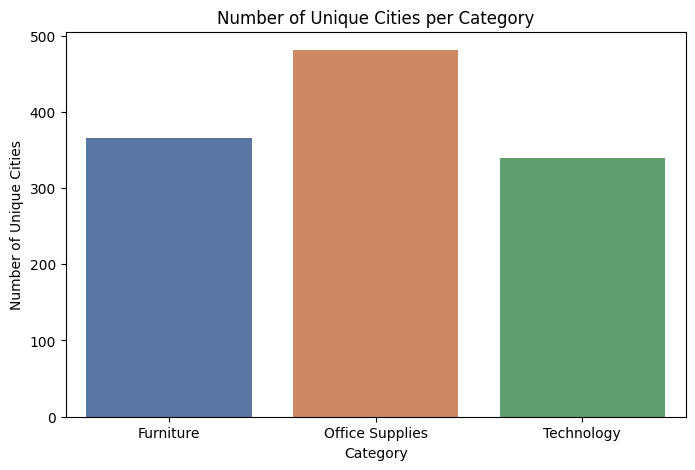

,Category,Unique City Count
0,Furniture,365
1,Office Supplies,481
2,Technology,340


In [23]:
df_city_per_category = df.groupby("Category")["City"].nunique().reset_index()
df_city_per_category.rename(columns={"City": "Unique City Count"}, inplace=True)
plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Unique City Count", data=df_city_per_category, palette="deep")

plt.xlabel("Category")
plt.ylabel("Number of Unique Cities")
plt.title("Number of Unique Cities per Category")
plt.show()
df_city_per_category

Technology has the highest total sales despite being in fewer unique cities, possibly due to higher per-unit prices. 

Even though Office Supplies are present in more cities, their total sales are lower compared to Technology and Furniture

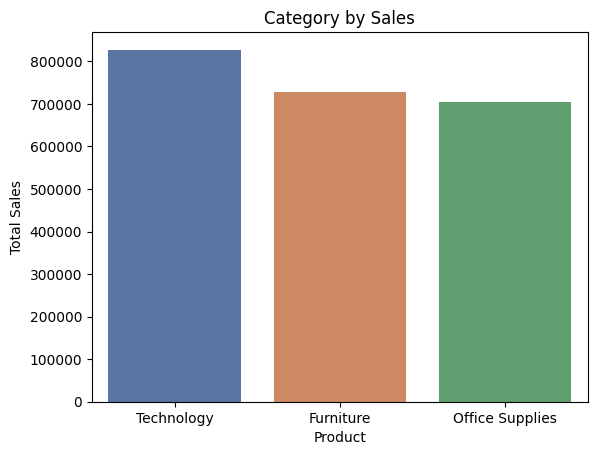

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

In [24]:
top_products = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=top_products.index, y=top_products.values, palette="deep")
plt.title('Category by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product')
plt.show()

top_products

Office Supplies have the most diverse set of sub-categories, possibly indicating a broad market demand across multiple products.
Technology is more focused on high-value sub-categories like Phones and Accessories, which could indicate a smaller but high-revenue market.

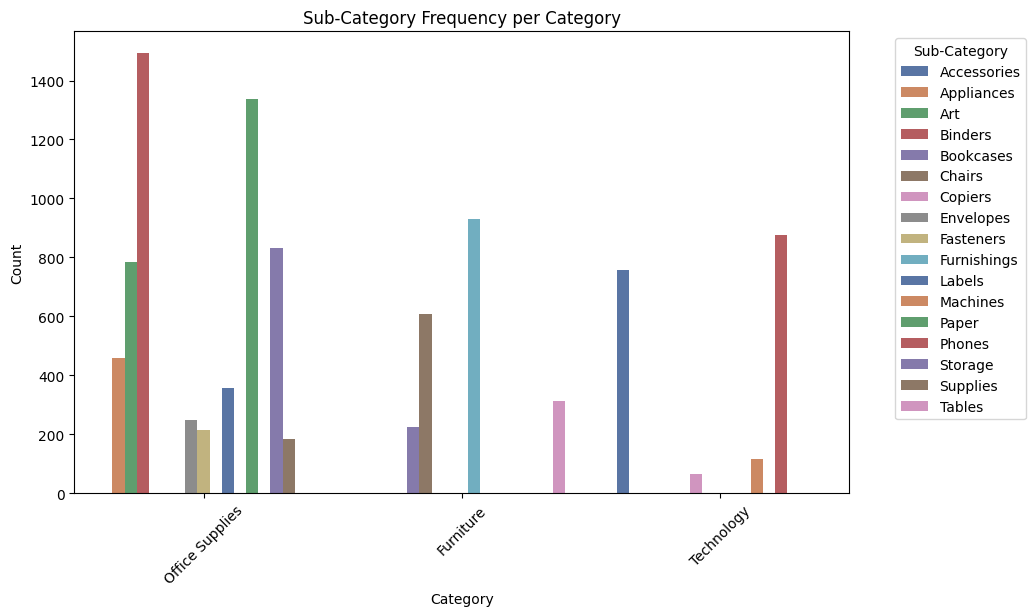

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Office Supplies,0.0,459.0,785.0,1492.0,0.0,0.0,0.0,248.0,214.0,0.0,357.0,0.0,1338.0,0.0,832.0,184.0,0.0
Furniture,0.0,0.0,0.0,0.0,226.0,607.0,0.0,0.0,0.0,931.0,0.0,0.0,0.0,0.0,0.0,0.0,314.0
Technology,756.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,115.0,0.0,876.0,0.0,0.0,0.0


In [25]:
df_grouped = df.groupby(["Category", "Sub-Category"]).size().unstack()
df_grouped = df_grouped.fillna(0)
df_grouped["Total"] = df_grouped.sum(axis=1) 
df_grouped = df_grouped.sort_values(by="Total", ascending=False).drop(columns=["Total"])

df_melted = df_grouped.reset_index().melt(id_vars="Category", var_name="Sub-Category", value_name="Count")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Category", y="Count", hue="Sub-Category", palette="deep")

plt.title("Sub-Category Frequency per Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.legend(title="Sub-Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

df_grouped

The West and East regions not only have high sales totals but also a higher number of transactions.

The South region has the lowest number of transactions and the lowest total sales, indicating either fewer transactions or lower average sales per transaction.

The Central region has moderate sales and transaction counts.

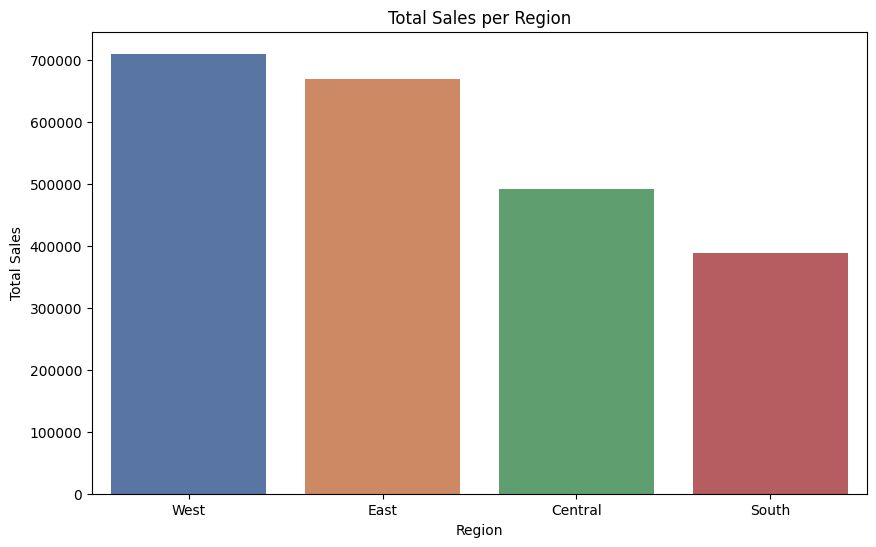

In [26]:
Regions=df.groupby('Region').sum('Sales').sort_values('Sales',ascending=False)
Regions=Regions[['Sales']].round(2)
Regions.reset_index(inplace=True)
Regions
plt.figure(figsize=(10,6))
sns.barplot(data=Regions, x="Region", y="Sales", palette="deep")
plt.title("Total Sales per Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


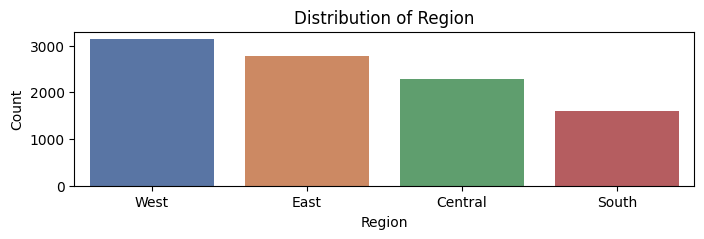

,Region,Count
0,West,3140
1,East,2785
2,Central,2277
3,South,1598


In [27]:
plt.figure(figsize=(8, 2))
sns.countplot(x=df["Region"], order=df["Region"].value_counts().index, palette="deep")
plt.title("Distribution of Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()
region_counts = df["Region"].value_counts().reset_index()
region_counts.columns = ["Region", "Count"]
region_counts


New York City dominates both in total sales revenue and transaction count.
Los Angeles also ranks high in both metrics, confirming its strong market presence.
Seattle ranks high in revenue (#3) but is lower in transaction count (#5)—indicating higher-value transactions.

Philadelphia has more transactions than Seattle but lower total revenue, suggesting lower-value sales.

Columbus and Springfield appear in transaction count but not in total sales, indicating lower-value, frequent purchases.

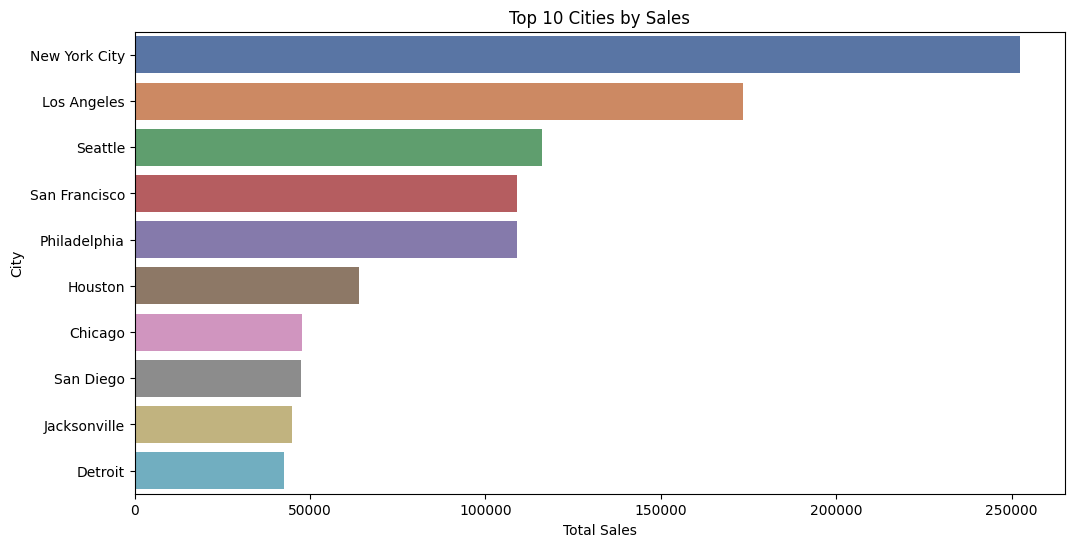

,City,Sales
0,New York City,252462.5470
1,Los Angeles,173420.1810
2,Seattle,116106.3220
3,San Francisco,109041.1200
4,Philadelphia,108841.7490
5,Houston,63956.1428
6,Chicago,47820.1330
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Detroit,42446.9440


In [28]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_cities, x="Sales", y="City", palette="deep")
plt.title("Top 10 Cities by Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.show()
top_cities

New York City has the highest transaction count

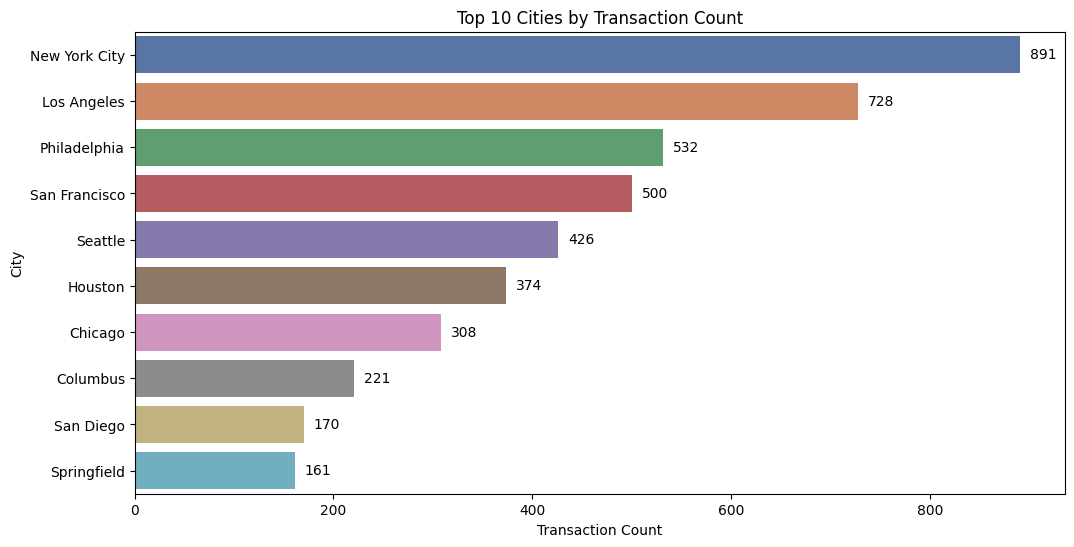

,City,count
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


In [29]:
city = df['City'].value_counts().reset_index()
city.columns = ['City', 'Count']
top_cities = city.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_cities, x="Count", y="City", palette="deep")
plt.title("Top 10 Cities by Transaction Count")
plt.xlabel("Transaction Count")
plt.ylabel("City")
for index, row in top_cities.iterrows():
    plt.text(row["Count"] + 10, index, f'{row["Count"]:,}', va='center')
plt.show()
city = df['City'].value_counts().reset_index()
city.head(10)

California has both the highest sales and customer count, meaning a large market presence.
New York and Texas rank the same in both metrics, meaning consistent average transaction values.
Washington (#4 in sales) has fewer customers than Pennsylvania (#3 in customers), meaning higher-value transactions in Washington.

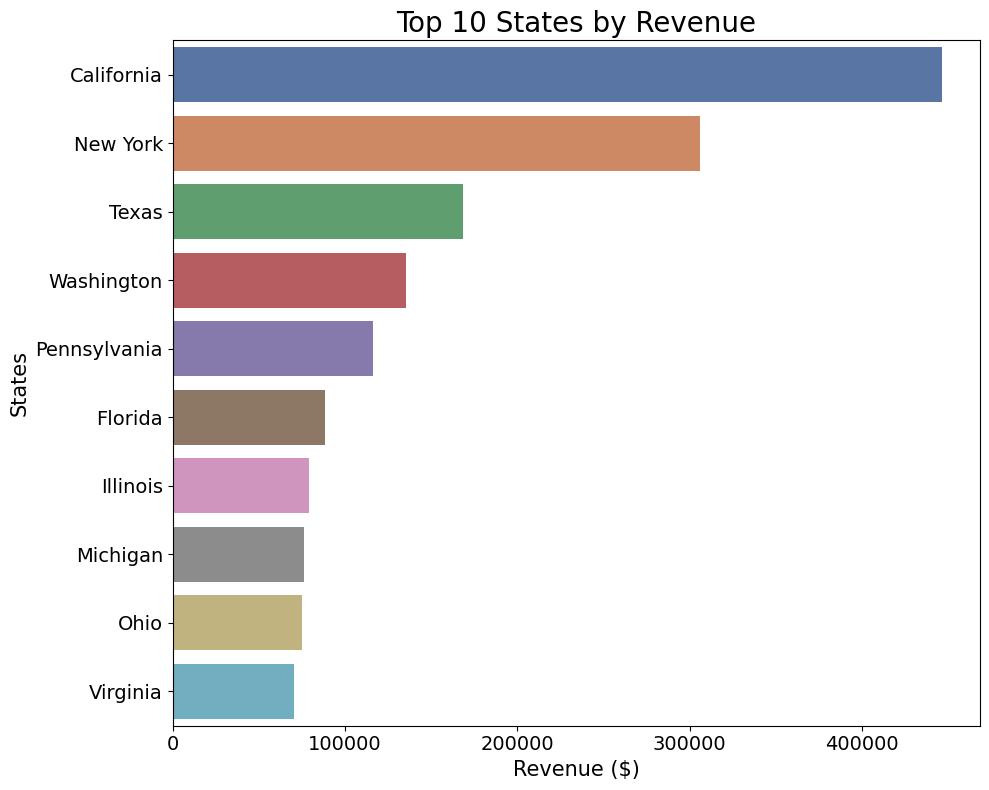

,State,Sales
3,California,446306.5
30,New York,306361.1
41,Texas,168572.5
45,Washington,135206.8
36,Pennsylvania,116276.6
8,Florida,88436.5
11,Illinois,79236.5
20,Michigan,76136.1
33,Ohio,75130.4
44,Virginia,70636.7


In [30]:
top_states = df.groupby('State')['Sales'].sum().reset_index()
top_states['Sales'] = top_states['Sales'].round(1)
top_states.sort_values(['Sales'], ascending=False, inplace=True)
top_states = top_states.head(10)

plt.figure(figsize=(10,8))
sns.barplot(y='State', x='Sales', data=top_states, palette='deep')
plt.title('Top 10 States by Revenue', fontsize=20)
plt.xlabel('Revenue ($)', fontsize=15)
plt.ylabel('States', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()
top_states

California has the most customers, nearly double New York's count. Texas follows closely behind New York.
North Carolina appears in customer count but not in the top 10 for sales, indicating lower spending per customer.

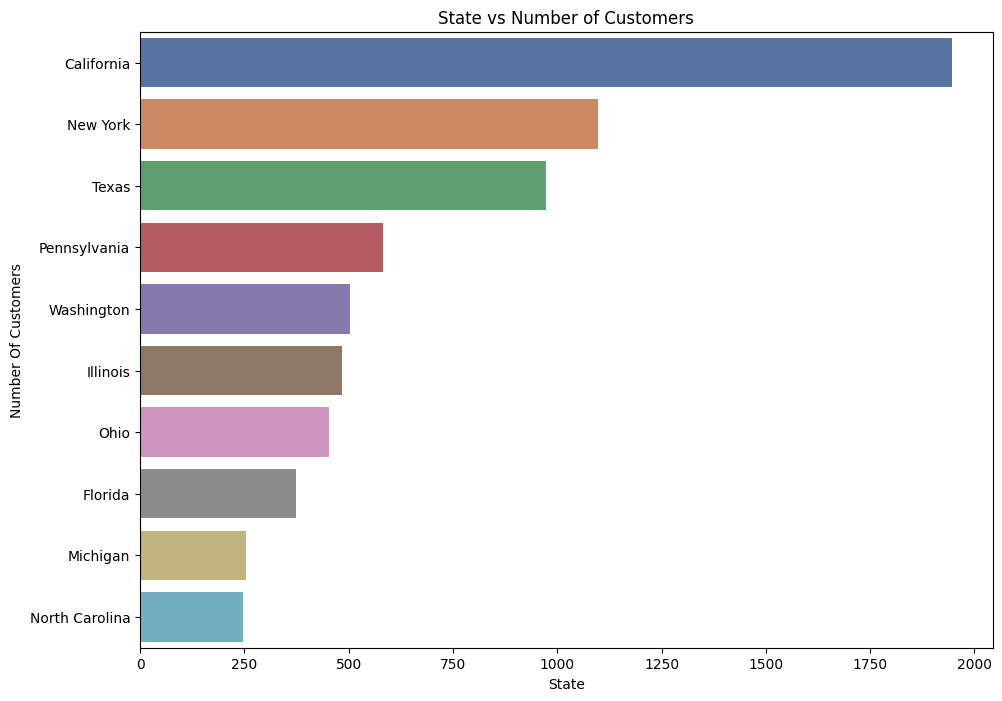

,State,Number Of Customers
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [31]:
state = df['State'].value_counts().reset_index()
state.columns = ['State', 'Number Of Customers']
state = state.sort_values(by='Number Of Customers', ascending=False)
state = state.head(10)
plt.figure(figsize=(11, 8))
sns.barplot(data=state, y="State", x="Number Of Customers", palette="deep")
plt.xlabel("State")
plt.ylabel("Number Of Customers")
plt.title("State vs Number of Customers")
plt.show()
state

In [32]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,year_order_date,month_order_date,day_order_date,weekday_order_date,year_ship_date,month_ship_date,day_ship_date,weekdayship_date,Shipping Duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2017,11,8,2,2017,11,11,5,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,2017,11,8,2,2017,11,11,5,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2017,6,12,0,2017,6,16,4,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,2016,10,11,1,2016,10,18,1,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2016,10,11,1,2016,10,18,1,7


Low recency : Customer has just made a transaction.

High recency : Customers haven't made a transaction for a long time (churn).

In [33]:
recency = df.groupby('Customer ID', as_index=False)['Order Date'].max()
recent_date = recency['Order Date'].max()
recency['Recency'] = recency['Order Date'].apply(lambda x: (recent_date - x).days)
recency.rename(columns={'Order Date': 'Last Purchase Date'}, inplace=True)
recency = recency.sort_values(by='Recency', ascending=False).reset_index(drop=True)
recency

,Customer ID,Last Purchase Date,Recency
0,NB-18580,2015-10-22,1165
1,GR-14560,2015-11-21,1135
2,RE-19405,2015-12-29,1097
3,CM-12715,2016-03-01,1034
4,VT-21700,2016-04-05,999
...,...,...,...
788,KB-16600,2018-12-29,1
789,PO-18865,2018-12-30,0
790,JM-15580,2018-12-30,0
791,CC-12430,2018-12-30,0


In [34]:
frequency = df.groupby(['Customer ID', 'Segment'], as_index=False)['Order Date'].count()
frequency.rename(columns={'Order Date': 'Frequency'}, inplace=True)
frequency = frequency.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
frequency

,Customer ID,Segment,Frequency
0,WB-21850,Consumer,35
1,PP-18955,Home Office,34
2,MA-17560,Home Office,34
3,JL-15835,Consumer,33
4,JD-15895,Corporate,32
...,...,...,...
788,JR-15700,Consumer,1
789,LD-16855,Corporate,1
790,RE-19405,Consumer,1
791,SC-20845,Consumer,1


In [35]:
monetary = df.groupby(['Customer ID', 'Segment'], as_index=False)['Sales'].sum()
monetary.rename(columns={'Sales': 'Monetary'}, inplace=True)
monetary = monetary.sort_values(by='Monetary', ascending=False).reset_index(drop=True)
monetary

,Customer ID,Segment,Monetary
0,SM-20320,Home Office,25043.050
1,TC-20980,Corporate,19052.218
2,RB-19360,Consumer,15117.339
3,TA-21385,Home Office,14595.620
4,AB-10105,Consumer,14473.571
...,...,...,...
788,MG-18205,Corporate,16.739
789,CJ-11875,Corporate,16.520
790,SC-20845,Consumer,14.112
791,LD-16855,Corporate,5.304


In [36]:
rfm = recency.merge(frequency, on='Customer ID')
rfm = rfm.merge(monetary, on='Customer ID')
rfm['Monetary'] = rfm['Monetary'].round(2)
rfm.drop(['Last Purchase Date', 'Segment_x', 'Segment_y'], axis=1, inplace=True)
rank = rfm.copy()

Recency (R) : Days since last purchase (Lower = More Recent)
Frequency (F) : Number of transactions (Higher = More Frequent)
Monetary (M) : Total amount spent (Higher = More Valuable)

In [37]:
rfm

,Customer ID,Recency,Frequency,Monetary
0,NB-18580,1165,2,273.87
1,GR-14560,1135,5,1284.38
2,RE-19405,1097,1,48.36
3,CM-12715,1034,13,3984.45
4,VT-21700,999,9,1736.60
...,...,...,...,...
788,KB-16600,1,9,983.92
789,PO-18865,0,13,2493.21
790,JM-15580,0,7,303.95
791,CC-12430,0,19,2870.05


In [38]:
rank['r_rank'] = rank['Recency'].rank(ascending=False)
rank['f_rank'] = rank['Frequency'].rank(ascending=False)
rank['m_rank'] = rank['Monetary'].rank(ascending=False)

rank['r_rank_norm'] = (rank['r_rank'] / rank['r_rank'].max()) * 100
rank['f_rank_norm'] = (rank['f_rank'] / rank['f_rank'].max()) * 100
rank['m_rank_norm'] = (rank['m_rank'] / rank['m_rank'].max()) * 100

rank.drop(['r_rank','f_rank','m_rank'], axis=1, inplace=True)

In [39]:
rank['rfm_score'] = (0.15*rank['r_rank_norm']) + (0.30*rank['f_rank_norm']) + (0.55*rank['m_rank_norm'])
rank = rank[['Customer ID','rfm_score']]
rank['rfm_score'] = round(rank['rfm_score']*0.05, 2)

In [40]:
top_customer = (rank['rfm_score'] >= 4.5)
high_value = ((rank['rfm_score']<4.5) & (rank['rfm_score']>=4))
medium_value = ((rank['rfm_score']<4) & (rank['rfm_score']>=3))
low_value = ((rank['rfm_score']<3) & (rank['rfm_score']>=1.5))
lost = (rank['rfm_score'] < 1.5)

rank.loc[top_customer, 'Customer Segment'] = 'Top Customer'
rank.loc[high_value, 'Customer Segment'] = 'High Value Customer'
rank.loc[medium_value, 'Customer Segment'] = 'Medium Value Customer'
rank.loc[low_value, 'Customer Segment'] = 'Low Value Customer'
rank.loc[lost, 'Customer Segment'] = 'Lost Customer'

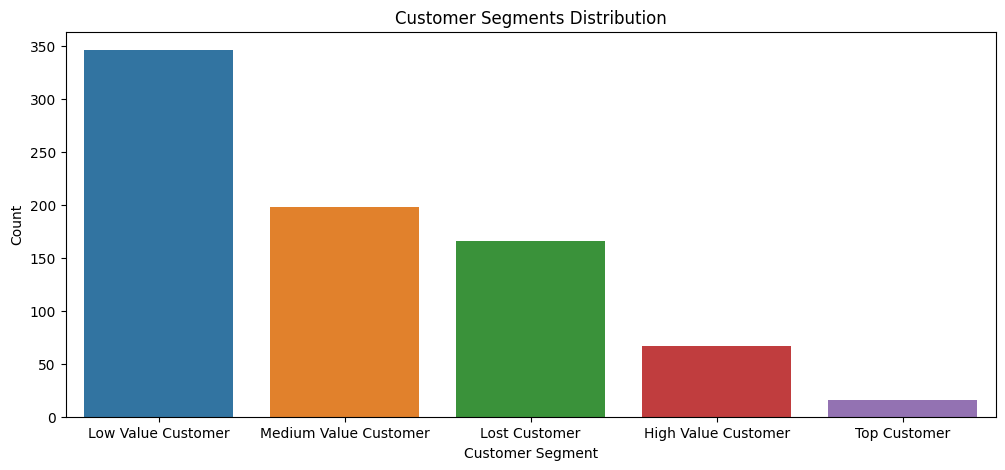

In [41]:
plt.figure(figsize=(12, 5))
sns.barplot(x=rank['Customer Segment'].value_counts().index, 
            y=rank['Customer Segment'].value_counts())

plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Customer Segments Distribution')
plt.show()


In [42]:
first_purchase_df = df.groupby('Customer ID', as_index=False)['Order Date'].min()
first_purchase_df.rename(columns={'Order Date':'First Purchase Date'}, inplace=True)

new_df = df.copy()
new_df = new_df.merge(first_purchase_df, on='Customer ID',how='left')
new_df['Time Since First Purchase'] = (new_df['Order Date'].max() -
                                        new_df['First Purchase Date']).dt.days

In [43]:
new_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,month_order_date,day_order_date,weekday_order_date,year_ship_date,month_ship_date,day_ship_date,weekdayship_date,Shipping Duration,First Purchase Date,Time Since First Purchase
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,11,8,2,2017,11,11,5,3,2016-10-15,806
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,11,8,2,2017,11,11,5,3,2016-10-15,806
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,6,12,0,2017,6,16,4,4,2017-06-12,566
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,10,11,1,2016,10,18,1,7,2016-10-11,810
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,10,11,1,2016,10,18,1,7,2016-10-11,810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,5,21,6,2017,5,28,6,7,2015-12-10,1116
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,1,12,1,2016,1,17,6,5,2016-01-12,1083
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,1,12,1,2016,1,17,6,5,2016-01-12,1083
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,1,12,1,2016,1,17,6,5,2016-01-12,1083


In [44]:
new_df = new_df.merge(rfm, on='Customer ID', how='left')
new_df = new_df.merge(rank, on='Customer ID', how='left')

In [45]:
new_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,day_ship_date,weekdayship_date,Shipping Duration,First Purchase Date,Time Since First Purchase,Recency,Frequency,Monetary,rfm_score,Customer Segment
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,11,5,3,2016-10-15,806,338,5,1148.78,3.51,Medium Value Customer
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,11,5,3,2016-10-15,806,338,5,1148.78,3.51,Medium Value Customer
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,16,4,4,2017-06-12,566,19,9,1119.48,3.72,Medium Value Customer
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,18,1,7,2016-10-11,810,29,15,2602.58,2.14,Low Value Customer
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,18,1,7,2016-10-11,810,29,15,2602.58,2.14,Low Value Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,28,6,7,2015-12-10,1116,29,24,2465.66,1.87,Low Value Customer
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,17,6,5,2016-01-12,1083,424,8,970.11,3.34,Medium Value Customer
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,17,6,5,2016-01-12,1083,424,8,970.11,3.34,Medium Value Customer
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,17,6,5,2016-01-12,1083,424,8,970.11,3.34,Medium Value Customer


In [46]:
churned = (new_df['Customer Segment'] == 'Lost Customer')
not_churned = (new_df['Customer Segment'] != 'Lost Customer')

new_df.loc[churned, 'Churned'] = 1
new_df.loc[not_churned, 'Churned'] = 0
new_df['Churned'] = new_df['Churned'].astype('int64')
new_df.rename(columns={'Churned':'Churn'}, inplace=True)

In [47]:
new_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,weekdayship_date,Shipping Duration,First Purchase Date,Time Since First Purchase,Recency,Frequency,Monetary,rfm_score,Customer Segment,Churn
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,5,3,2016-10-15,806,338,5,1148.78,3.51,Medium Value Customer,0
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,5,3,2016-10-15,806,338,5,1148.78,3.51,Medium Value Customer,0
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,4,4,2017-06-12,566,19,9,1119.48,3.72,Medium Value Customer,0
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,1,7,2016-10-11,810,29,15,2602.58,2.14,Low Value Customer,0
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,1,7,2016-10-11,810,29,15,2602.58,2.14,Low Value Customer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,6,7,2015-12-10,1116,29,24,2465.66,1.87,Low Value Customer,0
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,6,5,2016-01-12,1083,424,8,970.11,3.34,Medium Value Customer,0
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,6,5,2016-01-12,1083,424,8,970.11,3.34,Medium Value Customer,0
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,6,5,2016-01-12,1083,424,8,970.11,3.34,Medium Value Customer,0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

features = ['Recency','Frequency','Monetary','Time Since First Purchase']
target = 'Churn'
X = new_df[features]
y = new_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='linear', probability=True)
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    if name in ['SVM', 'Logistic Regression']: 
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.3f}')
    print(classification_report(y_test, y_pred))
    print('-'*50)

Logistic Regression Accuracy: 0.946
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.91      0.92      0.91       617

    accuracy                           0.95      1960
   macro avg       0.94      0.94      0.94      1960
weighted avg       0.95      0.95      0.95      1960

--------------------------------------------------
SVM Accuracy: 0.948
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.92      0.92      0.92       617

    accuracy                           0.95      1960
   macro avg       0.94      0.94      0.94      1960
weighted avg       0.95      0.95      0.95      1960

--------------------------------------------------


In [50]:
from sklearn.tree import DecisionTreeClassifier
features = ['Recency', 'Frequency', 'Monetary'] 
target = 'Churn'
X = new_df[features]
y = new_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {acc_dt:.3f}')
print(classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.984
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.99      0.96      0.97       617

    accuracy                           0.98      1960
   macro avg       0.98      0.98      0.98      1960
weighted avg       0.98      0.98      0.98      1960



In [51]:
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days
for unique in df['Ship Mode'].unique():
    print(unique.upper())
    print('Mean processing day' + ': ' + 
          str(round(df.loc[df['Ship Mode'] == unique]['Processing Time'].mean())))
    print('Max processing day: ' + str(df.loc[df['Ship Mode'] == unique]['Processing Time'].max()))
    print('Min processing day: ' + str(df.loc[df['Ship Mode'] == unique]['Processing Time'].min()))
    print('\n')

SECOND CLASS
Mean processing day: 3
Max processing day: 5
Min processing day: 1


STANDARD CLASS
Mean processing day: 5
Max processing day: 7
Min processing day: 3


FIRST CLASS
Mean processing day: 2
Max processing day: 4
Min processing day: 1


SAME DAY
Mean processing day: 0
Max processing day: 1
Min processing day: 0


